In [163]:
#importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [164]:
#reading data file
df= pd.read_excel(r"C:\Users\SATYAM\Downloads\pharma_forecasting_dummy_custom_500.xlsx")

In [165]:
df.head(5)

,Year,Country,Product Name,Dosage Form,Manufacturer,Price (USD),Units,Market / Channel,Sales (USD)
0,2025,India,DrugD,Syrup,Novartis,474.74,156,Retail,74059.44
1,2025,India,DrugB,Capsule,Roche,87.22,86,Retail,7500.92
2,2024,Germany,DrugB,IV Infusion,Sanofi,489.55,82,Hospital,40143.10
3,2025,Brazil,DrugC,Tablet,Sanofi,416.42,113,Hospital,47055.46
4,2024,Germany,DrugD,Capsule,Pfizer,43.98,166,Hospital,7300.68


<Axes: >

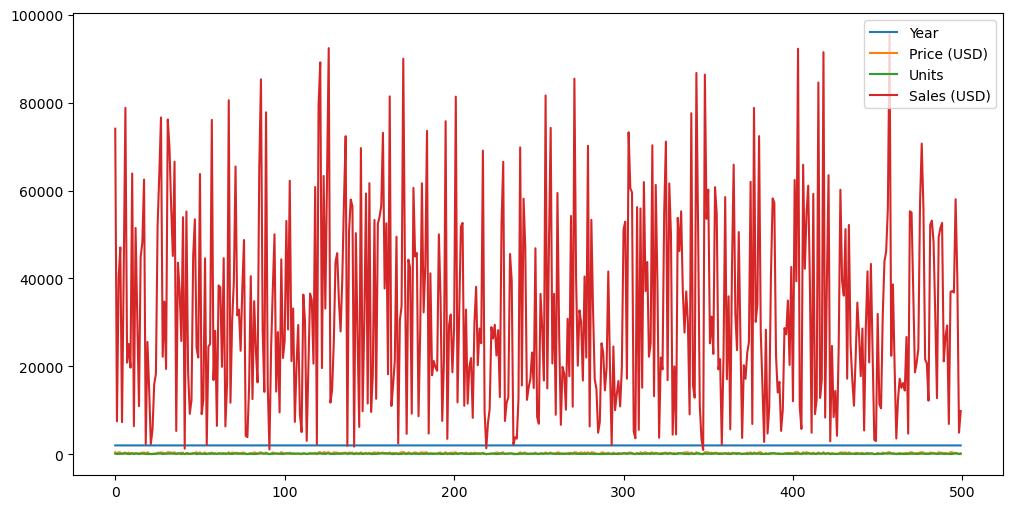

In [131]:
df.plot(figsize = (12,6))

In [132]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [133]:
df.head()

,Year,Country,Product Name,Dosage Form,Manufacturer,Price (USD),Units,Market / Channel,Sales (USD)
0,2025,India,DrugD,Syrup,Novartis,474.74,156,Retail,74059.44
1,2025,India,DrugB,Capsule,Roche,87.22,86,Retail,7500.92
2,2024,Germany,DrugB,IV Infusion,Sanofi,489.55,82,Hospital,40143.10
3,2025,Brazil,DrugC,Tablet,Sanofi,416.42,113,Hospital,47055.46
4,2024,Germany,DrugD,Capsule,Pfizer,43.98,166,Hospital,7300.68


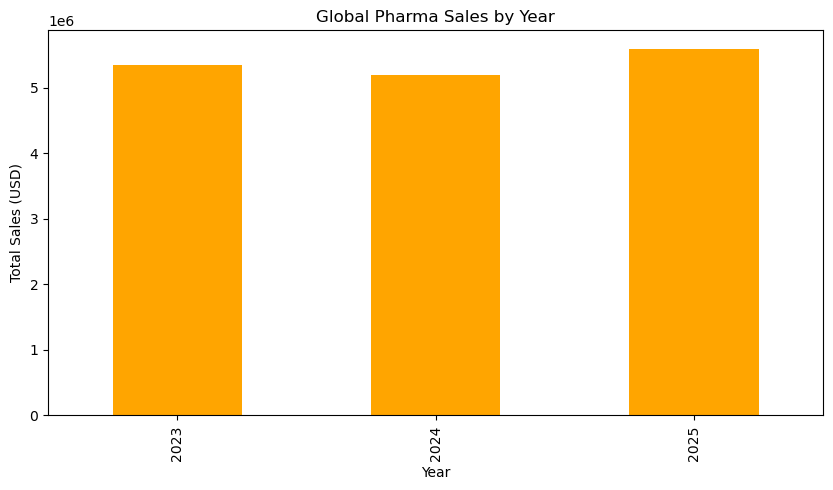

In [134]:
# Step 1: Group data
yearly_sales = df.groupby("Year")["Sales (USD)"].sum()

# Step 2: Plot bar chart
plt.figure(figsize=(10,5))
sales_by_year.plot(kind="bar", color="orange")
plt.title("Global Pharma Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.show()


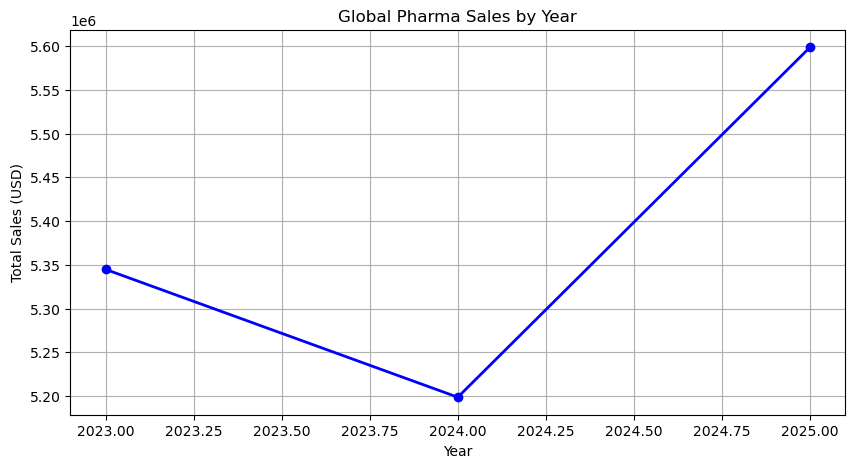

In [135]:
plt.figure(figsize=(10,5))
yearly_sales.plot(marker="o", linewidth=2, color="blue")
plt.title("Global Pharma Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

In [136]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Year  Price (USD)       Units   Sales (USD)
count   500.000000   500.000000  500.000000    500.000000
mean   2024.028000   253.548780  127.160000  32284.228620
std       0.817651   140.432403   44.266844  22122.780589
min    2023.000000    10.030000   50.000000    982.940000
25%    2023.000000   132.000000   86.750000  14638.112500
50%    2024.000000   257.345000  129.000000  27712.630000
75%    2025.000000   378.517500  168.000000  49423.140000
max    2025.000000   498.250000  200.000000  95532.450000


In [140]:
# Convert to DataFrame with datetime index
# Convert Year column to datetime index so we can treat it as a proper time series for resampling & forecasting

sales_df = yearly_sales.reset_index()
sales_df["Year"] = pd.to_datetime(sales_df["Year"], format="%Y")
sales_df.set_index("Year", inplace=True)

print("\nYearly Sales:")
print(sales_df)


Yearly Sales:
            Sales (USD)
Year                   
2023-01-01   5344808.47
2024-01-01   5198730.44
2025-01-01   5598575.40


In [141]:
sales_df.index

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', name='Year', freq=None)

In [143]:
 #Resample to monthly data
# Resampling is done to convert yearly data into monthly data.
# Many time series models (ARIMA/SARIMA) work better with higher frequency data (monthly),
# Since we only have yearly totals, we spread them evenly across 12 months as an approximation.


# Spread yearly sales equally across 12 months
monthly_sales = sales_df.resample(rule = "M").ffill()  # M means"Monthly", ffill()-forwardfills thevalue
monthly_sales["Sales (USD)"] = monthly_sales["Sales (USD)"] / 12

sales_series = monthly_sales["Sales (USD)"]




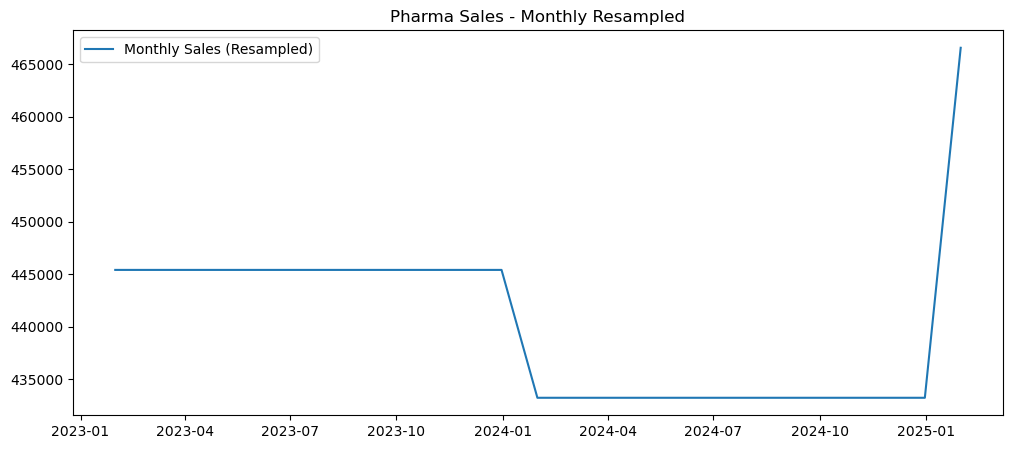

In [142]:
# Plot resampled data
plt.figure(figsize=(12,5))
plt.plot(sales_series, label="Monthly Sales (Resampled)")
plt.title("Pharma Sales - Monthly Resampled")
plt.legend()
plt.show()

In [144]:
sales_series

Year
2023-01-31    445400.705833
2023-02-28    445400.705833
2023-03-31    445400.705833
2023-04-30    445400.705833
2023-05-31    445400.705833
2023-06-30    445400.705833
2023-07-31    445400.705833
2023-08-31    445400.705833
2023-09-30    445400.705833
2023-10-31    445400.705833
2023-11-30    445400.705833
2023-12-31    445400.705833
2024-01-31    433227.536667
2024-02-29    433227.536667
2024-03-31    433227.536667
2024-04-30    433227.536667
2024-05-31    433227.536667
2024-06-30    433227.536667
2024-07-31    433227.536667
2024-08-31    433227.536667
2024-09-30    433227.536667
2024-10-31    433227.536667
2024-11-30    433227.536667
2024-12-31    433227.536667
2025-01-31    466547.950000
Freq: M, Name: Sales (USD), dtype: float64

In [65]:

#This step checks whether the variation in sales grows with time (multiplicative) or stays stable (additive). 

series = sales_series.dropna()

# Split the series into two halves
half = len(series) // 2
first_half = series[:half]
second_half = series[half:]

# Compute standard deviation for each half
std_first = np.std(first_half)
std_second = np.std(second_half)

print("Standard deviation - first half:", std_first)
print("Standard deviation - second half:", std_second)

""""- If the standard deviation in the second half is more than ~1.5 times the first half,  the series is considered multiplicative (variance grows with time).  
- Otherwise, it is considered additive (variance roughly constant). """

# Decide
if std_second > 1.5 * std_first:
    print("Likely Multiplicative (variance grows with trend)")
else:
    print("Likely Additive (variance roughly constant)")


Standard deviation - first half: 1.7462298274040222e-10
Standard deviation - second half: 8878.869049619812
Likely Multiplicative (variance grows with trend)


In [147]:
# Decompose the monthly sales series into trend, seasonal, and residual components(Classical Decomposition)
# - model='multiplicative': assumes seasonal fluctuations grow/shrink with trend
# - period=12: tells the function our data is monthly with a yearly seasonality cycle

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_series, model= 'multiplicative', period=12)

#trend
trend = decomposition.trend

#Repeating yearly seasonal pattern
seasonal = decomposition.seasonal

#noise after removing trend and seasonality
residual = decomposition.resid 

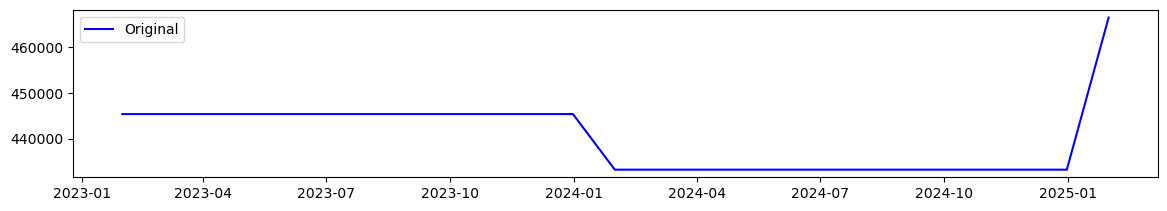

In [148]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(sales_series, label="Original", color="blue")
plt.legend(loc="upper left")

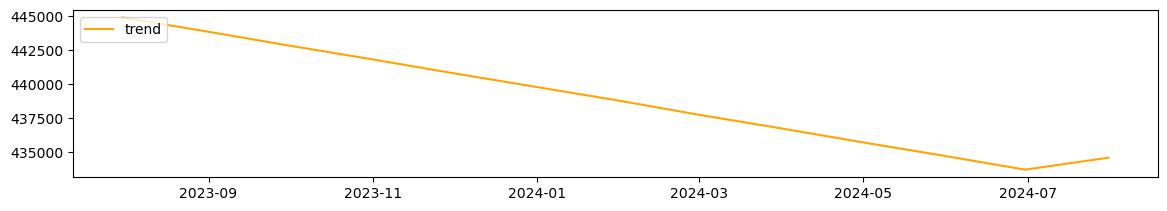

In [149]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(trend, label="trend", color='orange')
plt.legend(loc="upper left")

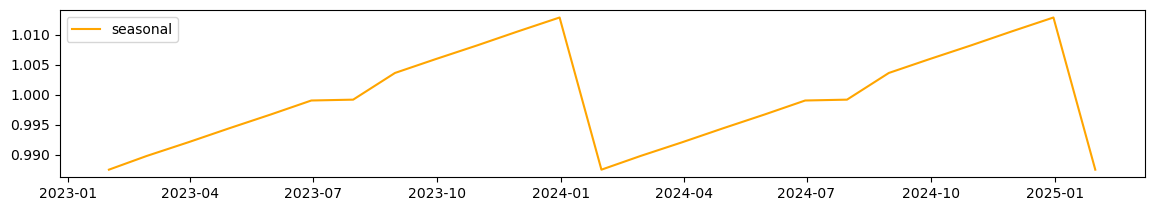

In [150]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(seasonal, label="seasonal", color='orange')
plt.legend(loc="upper left")

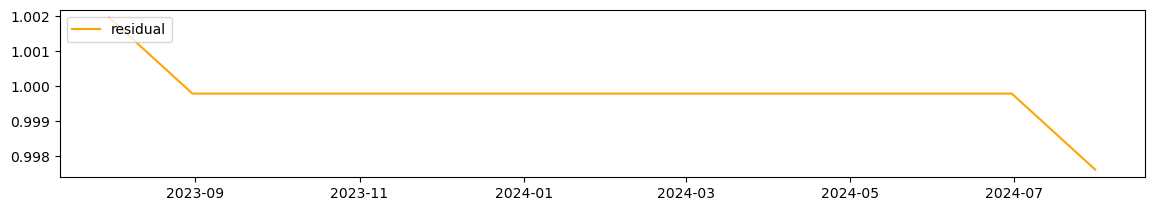

In [151]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(residual, label="residual", color='orange')
plt.legend(loc="upper left")

In [73]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss



In [152]:
adf_test = adfuller(sales_series.dropna())   # Run Augmented Dickey-Fuller test on the sales series (drop missing values)
print(f"Test Statistic: {adf_test[0]}") 
print(f"p-value: {adf_test[1]}")

#Decision Rule
if adf_test[1] < 0.05:
    print("Reject Null Hypothesis : series is stationary")
else:
    print("failed to reject null hypothesis: Series not stationary ")

Test Statistic: -1.2824326673350976
p-value: 0.6371705793442932
failed to reject null hypothesis: Series not stationary 


In [153]:
kpss_test = kpss(sales_series.dropna())  # Run KPSS test on the sales series (drop missing values)
print(f"Test Statistic: {kpss_test[0]}")
print(f"P-value: {kpss_test[1]}")

#Decision Rule
if kpss_test[1]< 0.05:
    print("Reject Null hypothesis: Series is non stationary")
else:
    print("Fail to reject null hypothesis: Series is stationary")

Test Statistic: 0.37262561478886996
P-value: 0.08895447638410778
Fail to reject null hypothesis: Series is stationary


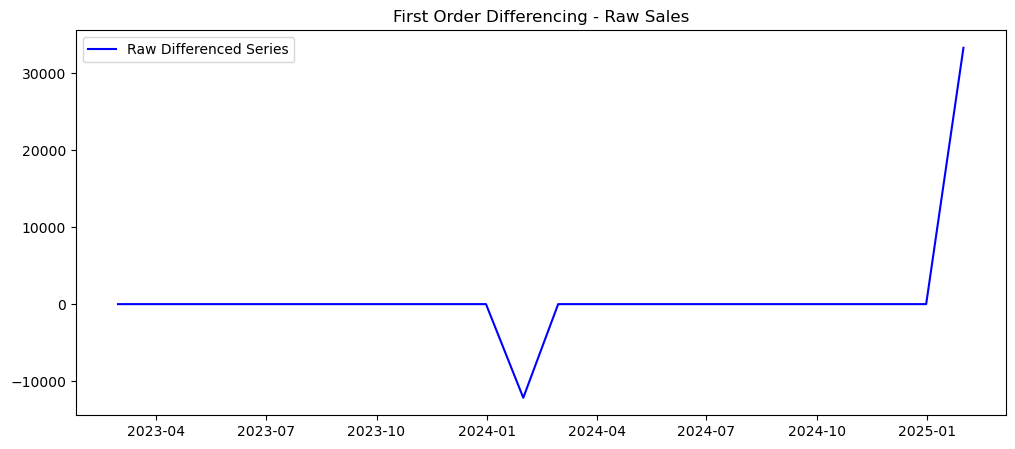

In [155]:
# First differencing (1st order)
sales_diff = sales_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12,5))
plt.plot(sales_diff, label="Raw Differenced Series", color="blue")
plt.title("First Order Differencing - Raw Sales")
plt.legend()
plt.show()




In [154]:
# ADF Test for first difference series
from statsmodels.tsa.stattools import adfuller, kpss

adf_test = adfuller(sales_diff)
print("ADF p-value (raw diff):", adf_test[1])

# KPSS Test
kpss_test = kpss(sales_diff, nlags="auto")
print("KPSS p-value (raw diff):", kpss_test[1])

ADF p-value (raw diff): 0.5687337452210697
KPSS p-value (raw diff): 0.1


After first differencing:

ADF test (p=0.56) → says series is not stationary.

KPSS test (p=0.10) → says series is stationary.

Since the two tests sometimes give opposite answers, we take a practical approach: assume d=1 is enough for differencing and confirm through model fitting.

In [156]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

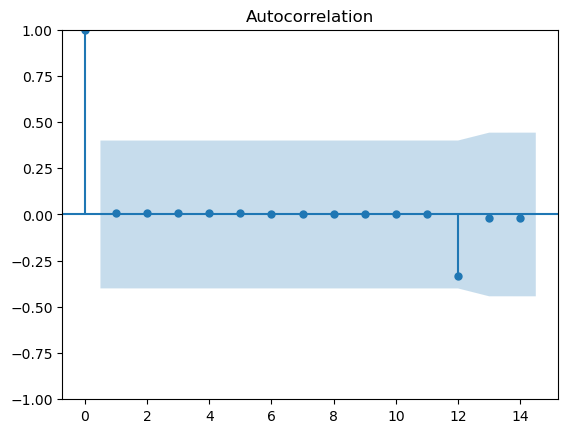

In [157]:
acf = plot_acf(sales_diff.dropna())

The first differencing has removed most of the trend and made the series approximately stationary. The series doesn’t show strong autocorrelations anymore, except possibly at seasonal lag 12.

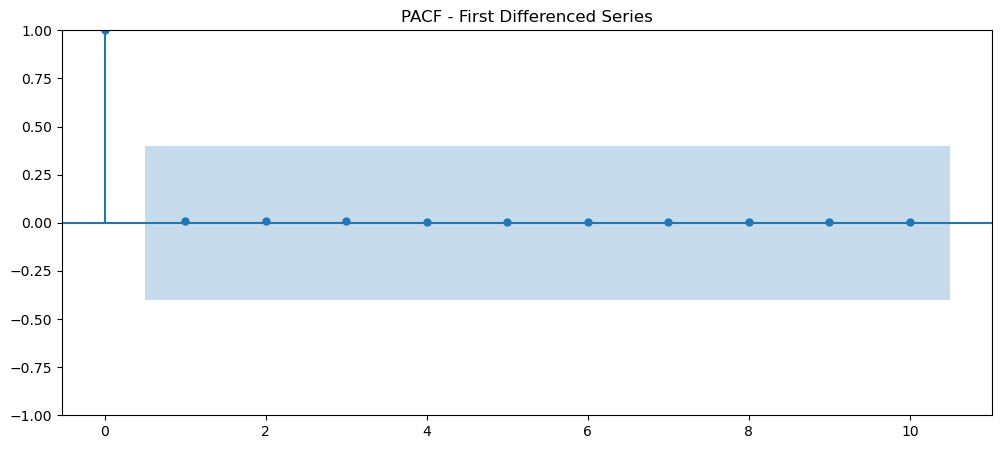

In [118]:
plt.figure(figsize=(12,5))
plot_pacf(sales_diff.dropna(), lags=10, ax=plt.gca(), method="ywm")
plt.title("PACF - First Differenced Series")
plt.show()

 PACF Plot:
 - The large spike at lag 0 is trivial (correlation of the series with itself).
 - All other lags (lag 1 and onwards) are inside the confidence band, i.e. not significant.
 - This means there is no strong autoregressive structure remaining in the differenced series.



In [159]:
sales_series

Year
2023-01-31    445400.705833
2023-02-28    445400.705833
2023-03-31    445400.705833
2023-04-30    445400.705833
2023-05-31    445400.705833
2023-06-30    445400.705833
2023-07-31    445400.705833
2023-08-31    445400.705833
2023-09-30    445400.705833
2023-10-31    445400.705833
2023-11-30    445400.705833
2023-12-31    445400.705833
2024-01-31    433227.536667
2024-02-29    433227.536667
2024-03-31    433227.536667
2024-04-30    433227.536667
2024-05-31    433227.536667
2024-06-30    433227.536667
2024-07-31    433227.536667
2024-08-31    433227.536667
2024-09-30    433227.536667
2024-10-31    433227.536667
2024-11-30    433227.536667
2024-12-31    433227.536667
2025-01-31    466547.950000
Freq: M, Name: Sales (USD), dtype: float64

In [95]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [96]:
train = sales_series.loc['2023']
test = sales_series.loc['2024']

In [98]:
horizon = len(test)

In [99]:
print("Train covers:", train.index.min(), "to", train.index.max())
print("Test covers:", train.index.min(), "to", test.index.max())

Train covers: 2023-01-31 00:00:00 to 2023-12-31 00:00:00
Test covers: 2023-01-31 00:00:00 to 2024-12-31 00:00:00


In [125]:
arima_model = ARIMA(sales_series, order=(1,1,1))
arima_res = arima_model.fit()
arima_fc = arima_res.forecast(steps=24)


order=(1,1,1) → ARIMA with:
 p=1 → includes one AR term (captures short-term persistence)
  d=1 → first differencing (removes trend, makes series stationary)
  q=1 → includes one MA term (captures short-term shocks/noise)

forecast(steps=24) → generate 24 months ahead prediction = 2 years
 (since our data is monthly after resampling)


In [160]:
arima_fc

2025-02-28    466547.95
2025-03-31    466547.95
2025-04-30    466547.95
2025-05-31    466547.95
2025-06-30    466547.95
2025-07-31    466547.95
2025-08-31    466547.95
2025-09-30    466547.95
2025-10-31    466547.95
2025-11-30    466547.95
2025-12-31    466547.95
2026-01-31    466547.95
2026-02-28    466547.95
2026-03-31    466547.95
2026-04-30    466547.95
2026-05-31    466547.95
2026-06-30    466547.95
2026-07-31    466547.95
2026-08-31    466547.95
2026-09-30    466547.95
2026-10-31    466547.95
2026-11-30    466547.95
2026-12-31    466547.95
2027-01-31    466547.95
Freq: M, Name: predicted_mean, dtype: float64

In [123]:
sarima_model = SARIMAX(sales_series, order=(1,1,1), seasonal_order=(1,0,1,12))
sarima_result = sarima_model.fit()
sarima_fore = sarima_result.forecast(steps=24)






 SARIMAX with order=(1,1,1), seasonal_order=(1,0,1,12)
 → (p,d,q) = (1,1,1): same as ARIMA → persistence, differencing, noise
 → (P,D,Q,m) = (1,0,1,12): adds yearly seasonality (12 months cycle)

 forecast(steps=24) → forecast 24 months ahead = 2 years


In [162]:
sarima_fc

2025-02-28    466548.619873
2025-03-31    466548.816189
2025-04-30    466548.873673
2025-05-31    466548.890340
2025-06-30    466548.894604
2025-07-31    466548.893737
2025-08-31    466548.886261
2025-09-30    466548.859427
2025-10-31    466548.767486
2025-11-30    466548.453675
2025-12-31    466547.382934
2026-01-31    445142.484932
2026-02-28    445142.453950
2026-03-31    445142.444885
2026-04-30    445142.442281
2026-05-31    445142.441695
2026-06-30    445142.442131
2026-07-31    445142.444331
2026-08-31    445142.452046
2026-09-30    445142.478432
2026-10-31    445142.568476
2026-11-30    445142.875707
2026-12-31    445143.923961
2027-01-31    466099.253130
Freq: M, Name: predicted_mean, dtype: float64

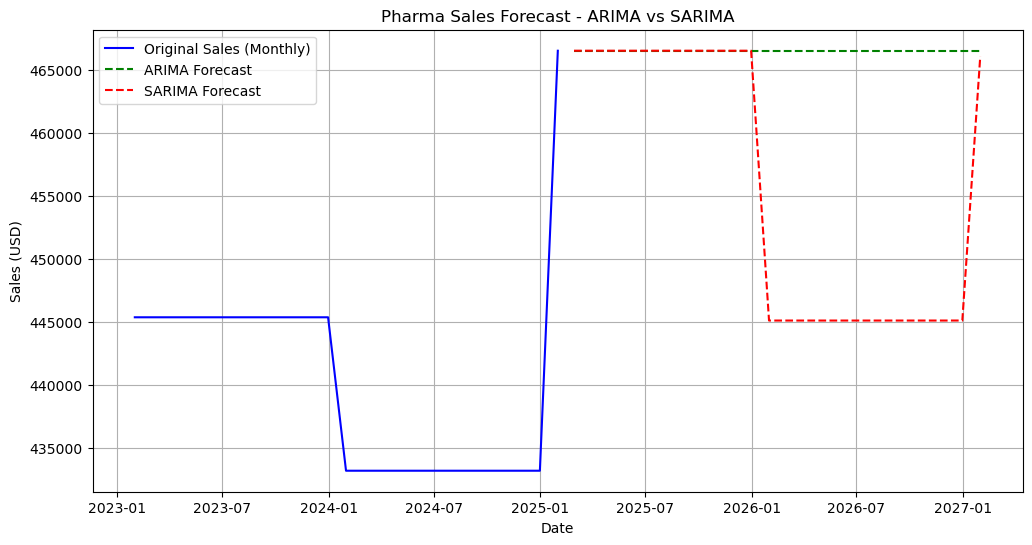

In [127]:
plt.figure(figsize=(12,6))
plt.plot(sales_series, label="Original Sales (Monthly)", color="blue")
plt.plot(arima_fc, label="ARIMA Forecast", color="green", linestyle="--")
plt.plot(sarima_fc, label="SARIMA Forecast", color="red", linestyle="--")

plt.title("Pharma Sales Forecast - ARIMA vs SARIMA")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.legend()
plt.grid(True)
plt.show()